In [8]:
import pandas as pd
df = pd.read_csv("C:\\Github\\python_study\\Pandas\\bank\\UniversalBank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
# 데이터 전처리
# 모델선정
# 튜닝
# 최종 모델의 성능 출력

In [10]:
df['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [12]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [13]:
df2 = df[df['Experience']>=0]

In [14]:
df2 = df.drop(['ID', 'ZIP Code','Age'], axis=1)
df2.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,19,34,3,1.5,1,0,0,1,0,0,0
2,15,11,1,1.0,1,0,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,0,1


In [15]:
df2.describe()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Axes: >

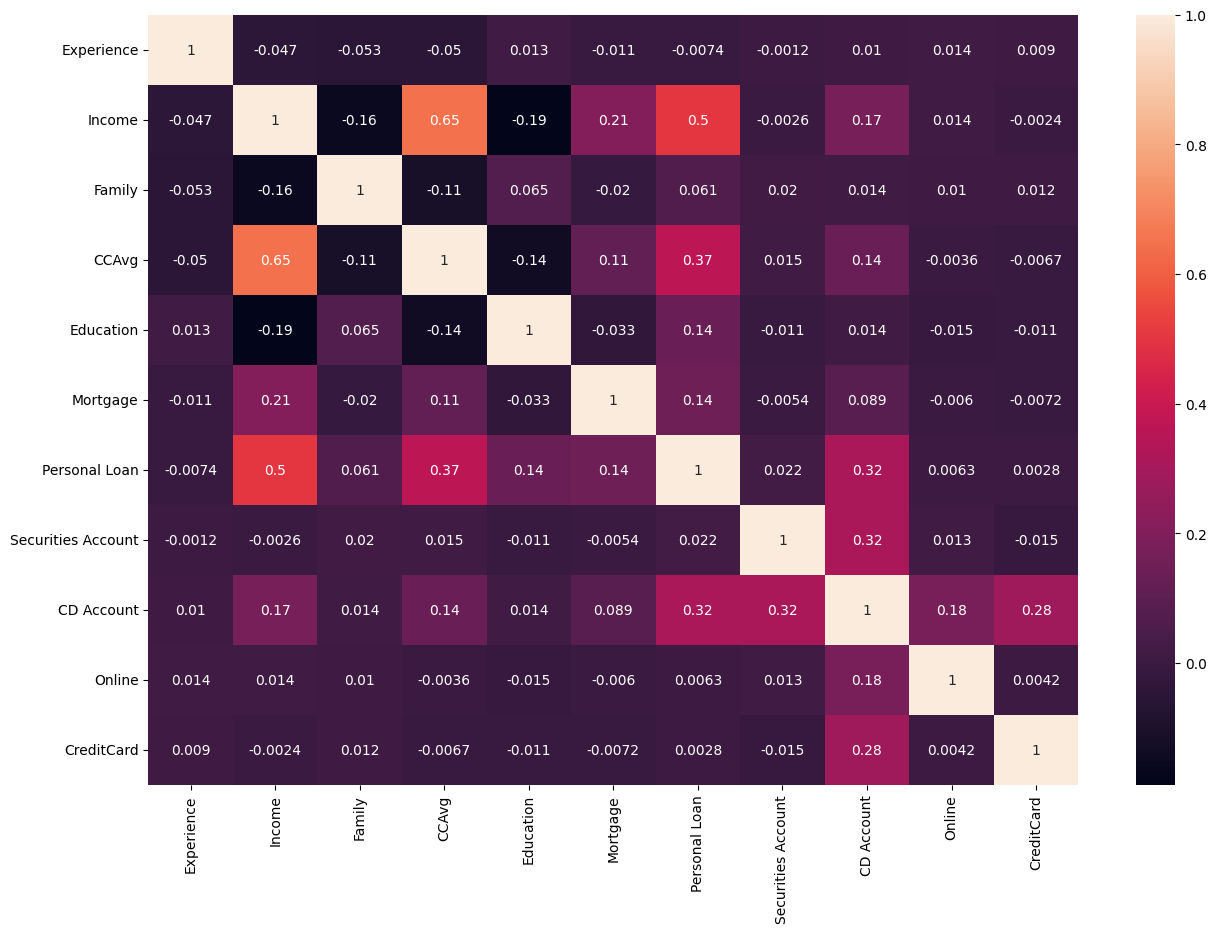

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True)

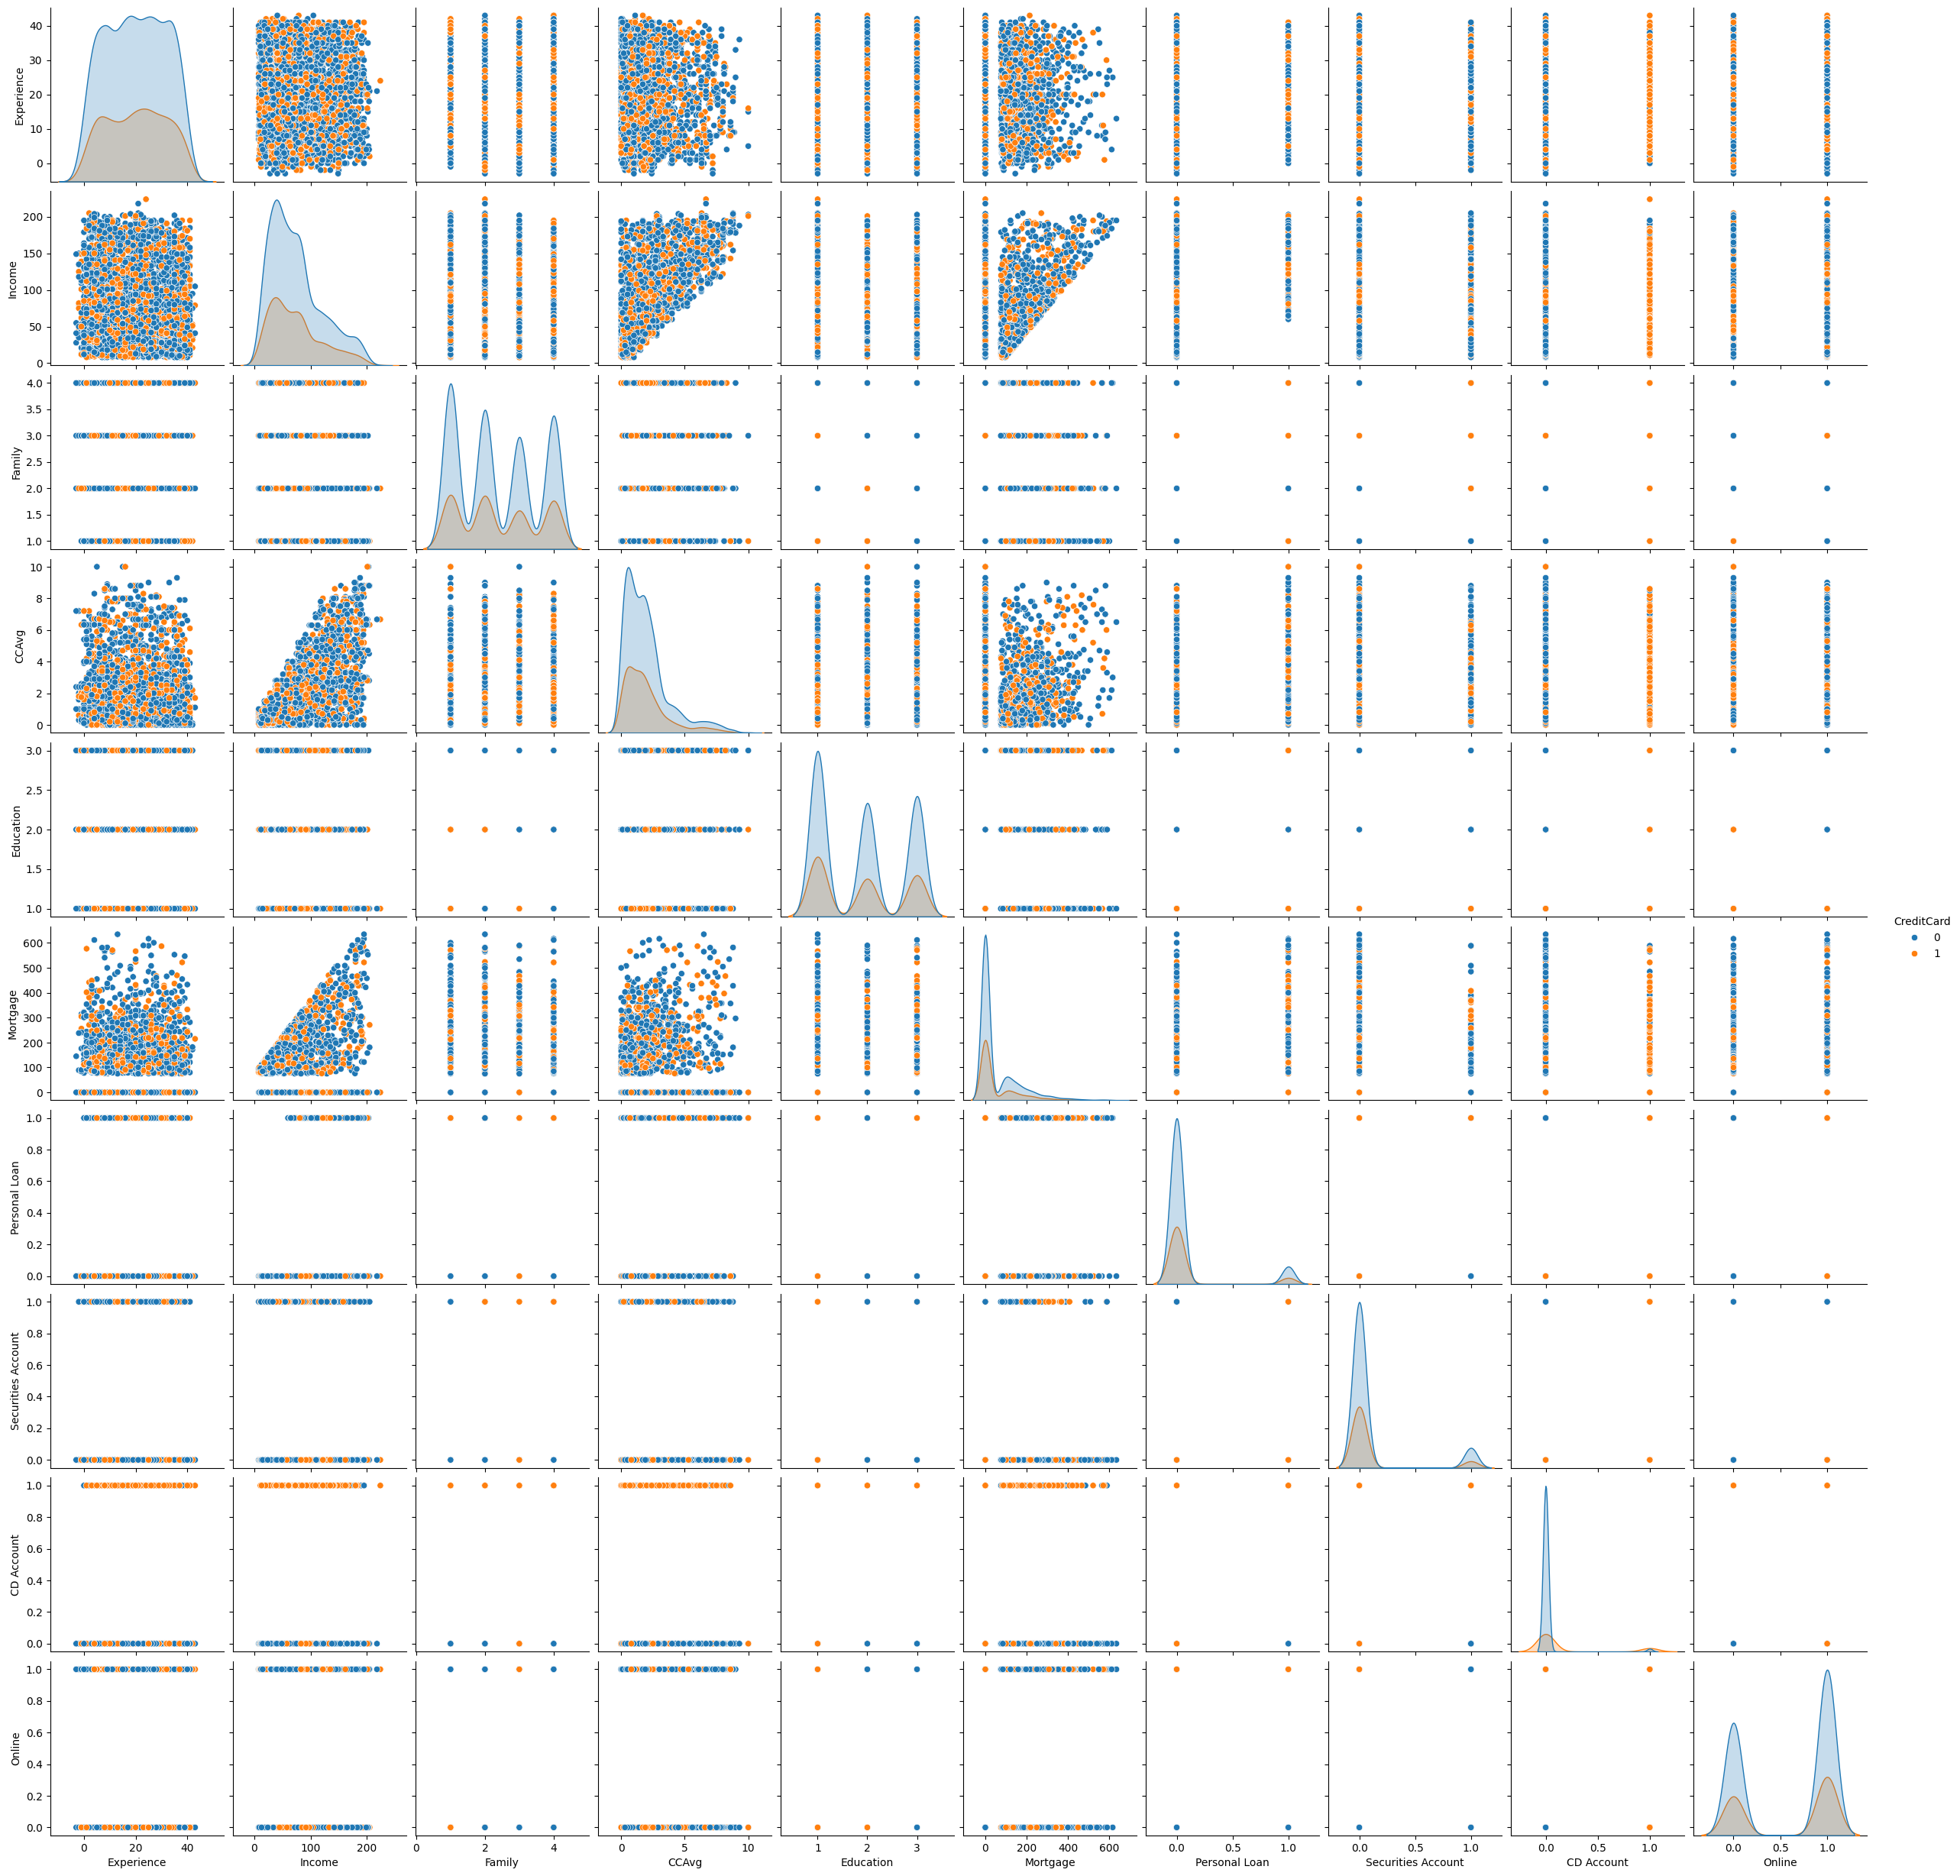

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df2, hue = 'CreditCard')

<Axes: xlabel='CreditCard', ylabel='count'>

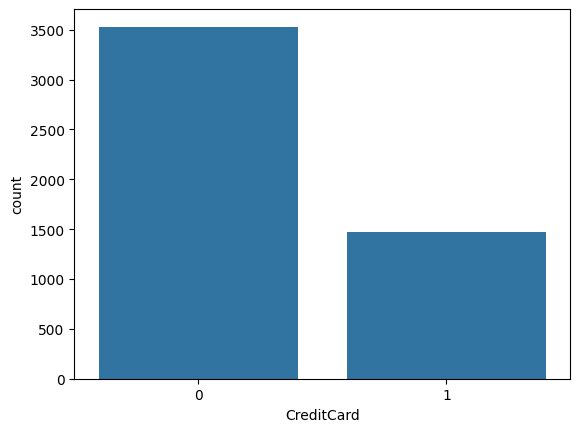

In [18]:
sns.countplot(data=df2, x='CreditCard')

In [19]:
from sklearn.model_selection import train_test_split
X = df2.drop(columns='CreditCard')
y = df2['CreditCard']
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [20]:
# from sklearn import svm
# model = svm.SVC()
# model.fit(x_train,y_train)

In [21]:
# 평가용 라이브러리 설정
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
# 평가용 함수
def print_score(clf, x_train, y_train, x_test, y_test, train = True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print('Train Result : \n =================================================')
        print(f'Accuracy score : {accuracy_score(y_train,pred)*100:.2f}%')
        print('-------------------------------------------------------------------')
        print(f'classification_report : \n{clf_report}')
        print('-------------------------------------------------------------------')
        print(f'confusion_matrix : \n{confusion_matrix(y_train,pred)}\n')
    else:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print('Train Result : \n =================================================')
        print(f'Accuracy score : {accuracy_score(y_test,pred)*100:.2f}%')
        print('-------------------------------------------------------------------')
        print(f'classification_report : \n{clf_report}')
        print('-------------------------------------------------------------------')
        print(f'confusion_matrix : \n{confusion_matrix(y_test,pred)}\n')

In [23]:
# print_score(model,x_train,y_train, x_test, y_test, train = True)
# print_score(model,x_train,y_train, x_test, y_test, train = False)

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline # 자동화를 지원하는 라이브러리

# 서로다른 스케일링 기법을 순차적으로 적용 - 일반적으로 사용하는 방법이 아님
pipeline = Pipeline([
 ('min_max_scaler', MinMaxScaler()),
 ('std_scaler',StandardScaler())   
])
print(f"x shape: {X.shape} y shape {y.shape}")

x shape: (5000, 10) y shape (5000,)


In [25]:
# 전처리 한 후 성능평가
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.fit_transform(x_test)

In [26]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'C' : [0.01,0.1,0.5,1,10,100],
#     'gamma' : ['scale','auto'],
#     'kernel' : ['rbf', 'poly', 'linear'],
#     'degree' : [1,2,3,4,5]
# }
# grid = GridSearchCV(svm.SVC(),param_grid=param_grid,cv=5, refit=True)
# # refit=True 기본값.. 성능이 좋은 parameter를 가지고 다시 전체데이터를 재 학습
# grid.fit(x_train,y_train)

In [27]:
# # 데이터 표준화 - 표준화된 데이터를 svc 적용하는데.. 커널별로 적용
# # 이러한 과정을
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split
# from sklearn import svm


In [28]:
# 데이터 표준화 - 표준화된 데이터르 svc 적용하는데.. 커널별로 적용
# 이러한 과정을 파이프라인에 넣어서 한번에 처리한다.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import svm

In [29]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X = df2.drop(columns='CreditCard')
y = df2['CreditCard']
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

# 파이프라인 정의
pipeline = Pipeline([
    ('minmax', MinMaxScaler()),
    ('std_scaler', StandardScaler()),
    ('svm', svm.SVC())
])

param_grid = {
    'svm__C' : [0.01,0.1,0.5,1,10],
    # 'svm__gamma' : ['scale','auto'],
    'svm__kernel' : ['linear', 'poly', 'rbf'],
    'svm__degree' : [1,2,3,4,5]

}
gridcv = GridSearchCV(pipeline,param_grid=param_grid,cv=5)
# 하이퍼 파라이터 적용
gridcv.fit(x_train,y_train)

print(f'best parameters : {gridcv.best_params_}')
model = gridcv.best_estimator_
print_score(model,x_train,y_train,x_test,y_test,train=True)
print_score(model,x_train,y_train,x_test,y_test,train=False)

best parameters : {'svm__C': 10, 'svm__degree': 2, 'svm__kernel': 'poly'}
Train Result : 
Accuracy score : 74.85%
-------------------------------------------------------------------
classification_report : 
                     0            1  accuracy    macro avg  weighted avg
precision     0.740678     0.880952  0.748533     0.810815      0.781937
recall        0.990555     0.167724  0.748533     0.579140      0.748533
f1-score      0.847584     0.281797  0.748533     0.564691      0.681167
support    2647.000000  1103.000000  0.748533  3750.000000   3750.000000
-------------------------------------------------------------------
confusion_matrix : 
[[2622   25]
 [ 918  185]]

Train Result : 
Accuracy score : 73.76%
-------------------------------------------------------------------
classification_report : 
                    0           1  accuracy    macro avg  weighted avg
precision    0.731443    0.882353    0.7376     0.806898      0.775750
recall       0.993205    0.122616    

In [30]:
# 머신러닝은 사용하기 위해서 이론상 85% 이상 높아야 함

성능개선

In [31]:
# 데이터 가져오기
import pandas as pd
df = pd.read_csv("C:\\Github\\python_study\\Pandas\\bank\\UniversalBank.csv")
df.head()
# 데이터 전처리
# 모델선정
# 튜닝
# 최종 모델의 성능 출력

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [32]:
df2.loc[:,['Experience','Income','CCAvg','Mortgage']].head()

,Experience,Income,CCAvg,Mortgage
0,1,49,1.6,0
1,19,34,1.5,0
2,15,11,1.0,0
3,9,100,2.7,0
4,8,45,1.0,0


In [33]:
import numpy as np 
# 범주화
_ , exp_bins = np.histogram(df2['Experience'],bins='auto')
_ , Income_bins = np.histogram(df2['Income'],bins='auto')
_ , CCAvg_bins = np.histogram(df2['CCAvg'],bins='auto')
_ , Mortgage_bins = np.histogram(df2['Mortgage'],bins='auto')

exp_bins_category = pd.cut(df2['Experience'],bins=exp_bins,labels=False)
Income_bins_category = pd.cut(df2['Income'],bins=Income_bins,labels=False)
CCAvg_bins_category = pd.cut(df2['CCAvg'],bins=CCAvg_bins,labels=False)
Mortgage_bins_category = pd.cut(df2['Mortgage'],bins=Mortgage_bins,labels=False)

In [34]:
df4 = df2.drop(['Experience','Income','CCAvg','Mortgage'],axis=1)
df4['exp_bins_category'] = exp_bins_category
df4['Income_bins_category'] = Income_bins_category
df4['CCAvg_bins_category'] = CCAvg_bins_category
df4['Mortgage_bins_category'] = Mortgage_bins_category

In [41]:
df4.isna().sum()
df4.fillna(0)

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,exp_bins_category,Income_bins_category,CCAvg_bins_category,Mortgage_bins_category
0,4,1,0,1,0,0,0,1.0,6.0,7.0,0.0
1,3,1,0,1,0,0,0,9.0,3.0,7.0,0.0
2,1,1,0,0,0,0,0,7.0,0.0,4.0,0.0
3,1,2,0,0,0,0,0,5.0,13.0,12.0,0.0
4,4,2,0,0,0,0,1,4.0,5.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,1,3,0,0,0,1,0,2.0,4.0,9.0,0.0
4996,4,1,0,0,0,1,0,3.0,1.0,1.0,7.0
4997,2,3,0,0,0,0,0,18.0,2.0,1.0,0.0
4998,3,2,0,0,0,1,0,18.0,6.0,2.0,0.0
